### Decision Tree Classifier Implementation with post pruning:-

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [21]:
df=sns.load_dataset("iris")

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
x=df.drop(["species"],axis=1)
y=df["species"]

In [24]:
from sklearn.model_selection  import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.20,random_state =128)

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [26]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

### perform post pruning:-

[Text(0.5416666666666666, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [39, 39, 42]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.499\nsamples = 81\nvalue = [0, 39, 42]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.095\nsamples = 40\nvalue = [0, 38, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.051\nsamples = 38\nvalue = [0, 37, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.25, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1

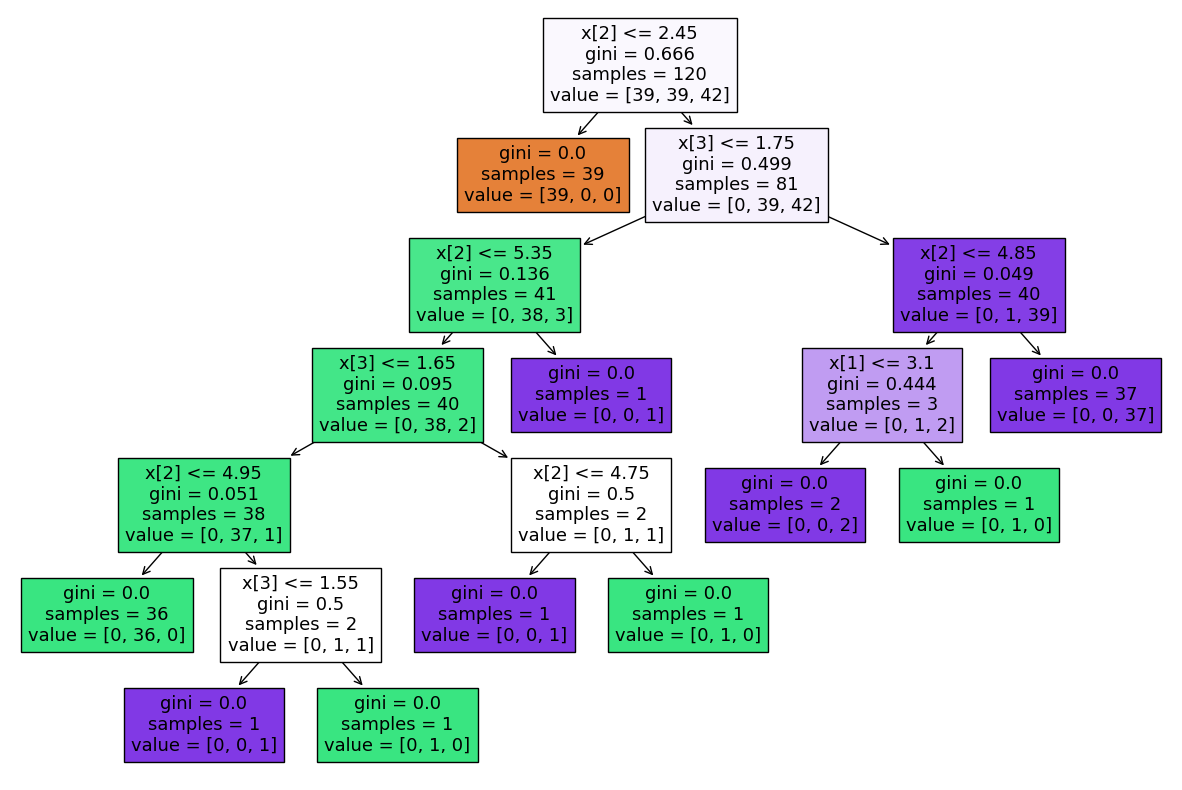

In [27]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)

In [28]:
model=DecisionTreeClassifier(max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [39, 39, 42]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.499\nsamples = 81\nvalue = [0, 39, 42]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]')]

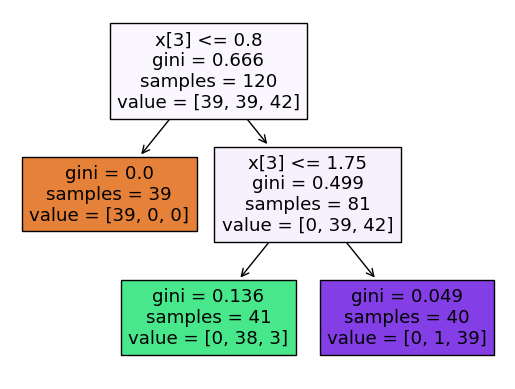

In [30]:
tree.plot_tree(model,filled=True)

In [31]:
y_pred=model.predict(x_test)

In [32]:
y_pred

array(['setosa', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica'], dtype=object)

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.9333333333333333

In [39]:
from sklearn.model_selection import GridSearchCV


In [37]:
parameters={
    "max_depth":[1,2,3,4,5],
    "criterion":["gini", "entropy", "log_loss"],
    "splitter":["best", "random"],
    
    
}

In [48]:
cv=GridSearchCV(model,param_grid=parameters,cv=5)

In [52]:
cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [53]:
cv.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

In [55]:
model=DecisionTreeClassifier(criterion="gini",max_depth=2,splitter="best")

In [56]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [58]:
y_pred=model.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred)

0.9333333333333333

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [39, 39, 42]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.499\nsamples = 81\nvalue = [0, 39, 42]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.136\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.049\nsamples = 40\nvalue = [0, 1, 39]')]

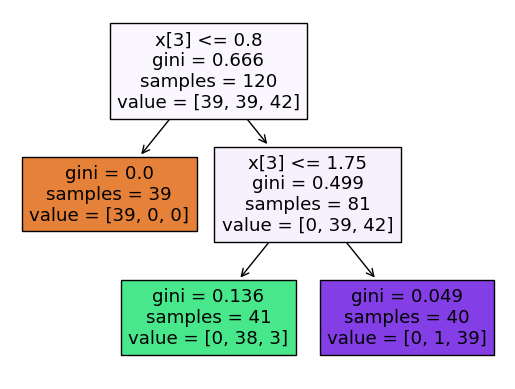

In [61]:
tree.plot_tree(model,filled=True)